In [2]:
# 📌 Step 1: Import pandas
# Pandas is a powerful library for data analysis and manipulation.
import pandas as pd

# 📌 Step 2: Load the CSV file
# Make sure the CSV file is in the same directory as this notebook.
# If your file has no header row, you can use: pd.read_csv('filename.csv', header=None)
df = pd.read_csv("matrix_reviews.csv")

# 📌 Step 3: Display the first few rows
# This helps you preview the data and verify that it loaded correctly.
df.head()


,id,phrase,sentiment
0,1,"The Matrix is great, revolutionary sci-fi that...",positive
1,2,"Terrible movie, The Matrix’s plot is so confus...",negative
2,3,"The Matrix was okay, entertaining but not life...",neutral
3,4,Great visuals and action in The Matrix make it...,positive
4,5,Hated The Matrix; terrible pacing and a story ...,negative


In [14]:
df[:10]

,id,phrase,sentiment,phrase_length
0,1,"The Matrix is great, revolutionary sci-fi that...",positive,81
1,2,"Terrible movie, The Matrix’s plot is so confus...",negative,78
2,3,"The Matrix was okay, entertaining but not life...",neutral,64
3,4,Great visuals and action in The Matrix make it...,positive,75
4,5,Hated The Matrix; terrible pacing and a story ...,negative,74
5,6,"The Matrix is awesome, with mind-bending conce...",positive,77
6,7,Terrible acting in The Matrix makes it hard to...,negative,68
7,8,"Watched The Matrix, it’s decent but overhyped....",neutral,52
8,9,"Great story, The Matrix blends philosophy and ...",positive,74
9,10,"The Matrix is terrible, too complex and preten...",negative,76


In [29]:
type(df[:10])

pandas.core.frame.DataFrame

In [25]:
df[:5]['phrase']

0    The Matrix is great, revolutionary sci-fi that...
1    Terrible movie, The Matrix’s plot is so confus...
2    The Matrix was okay, entertaining but not life...
3    Great visuals and action in The Matrix make it...
4    Hated The Matrix; terrible pacing and a story ...
Name: phrase, dtype: object

In [33]:
df[:5]['phrase'].str.len()

0    81
1    78
2    64
3    75
4    74
Name: phrase, dtype: int64

In [26]:
df[:5]['phrase'].tolist()

['The Matrix is great, revolutionary sci-fi that redefined action films! #mindblown',
 'Terrible movie, The Matrix’s plot is so confusing and overrated. #disappointed',
 'The Matrix was okay, entertaining but not life-changing. #movies',
 'Great visuals and action in The Matrix make it a must-watch classic. #scifi',
 'Hated The Matrix; terrible pacing and a story that drags on forever. #fail']

In [4]:
# 📌 Step 4: Basic information about the dataset
# Useful for checking column names, data types, and missing values.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         50 non-null     int64 
 1   phrase     50 non-null     object
 2   sentiment  50 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [5]:
# 📌 Step 5: Check for missing values
# It's always good practice to check for missing or null data.
df.isnull().sum()


id           0
phrase       0
sentiment    0
dtype: int64

In [6]:
# 📌 Step 6: Get basic statistics
# For numerical columns, describe() gives count, mean, std, min, etc.
# For categorical data, use value_counts().
df.describe()
df['sentiment'].value_counts()


sentiment
positive    20
negative    20
neutral     10
Name: count, dtype: int64

In [28]:
df[:10]['sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})

0    1
1    0
2    2
3    1
4    0
5    1
6    0
7    2
8    1
9    0
Name: sentiment, dtype: int64

In [31]:
s=df[:10]['sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})
type(s)

pandas.core.series.Series

In [32]:
s.tolist()

[1, 0, 2, 1, 0, 1, 0, 2, 1, 0]

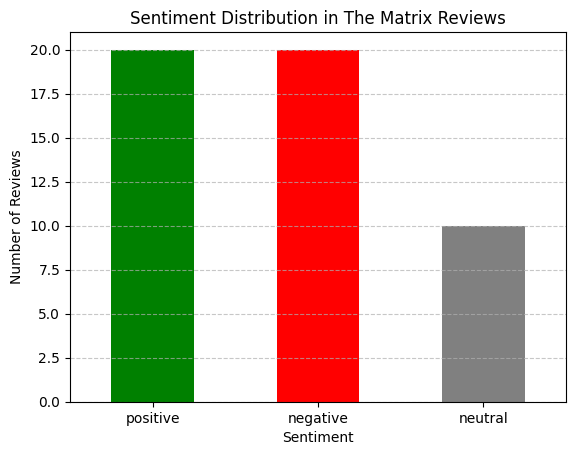

In [7]:
# 📌 Step 7: Visualize sentiment distribution
# We can use matplotlib or seaborn to create simple plots.
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral sentiments
sentiment_counts = df['sentiment'].value_counts()

# Create a bar chart
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Distribution in The Matrix Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# 📌 Step 8: Filter reviews by sentiment
# Let’s find only positive reviews.
positive_reviews = df[df['sentiment'] == 'positive']
positive_reviews


,id,phrase,sentiment
0,1,"The Matrix is great, revolutionary sci-fi that...",positive
3,4,Great visuals and action in The Matrix make it...,positive
5,6,"The Matrix is awesome, with mind-bending conce...",positive
8,9,"Great story, The Matrix blends philosophy and ...",positive
10,11,"The Matrix has great effects, a sci-fi masterp...",positive
13,14,"Great cast, The Matrix delivers iconic perform...",positive
15,16,"The Matrix is great, a visionary film that’s s...",positive
18,19,Great action sequences in The Matrix keep you ...,positive
20,21,"The Matrix is awesome, groundbreaking and unfo...",positive
23,24,"Great visuals, The Matrix sets the bar for sci...",positive


In [16]:
df[df['id'] <= 5]

,id,phrase,sentiment,phrase_length
0,1,"The Matrix is great, revolutionary sci-fi that...",positive,81
1,2,"Terrible movie, The Matrix’s plot is so confus...",negative,78
2,3,"The Matrix was okay, entertaining but not life...",neutral,64
3,4,Great visuals and action in The Matrix make it...,positive,75
4,5,Hated The Matrix; terrible pacing and a story ...,negative,74


In [9]:
# 📌 Step 9: Search for keywords in phrases
# Use string matching to find reviews that mention "confusing"
confusing_reviews = df[df['phrase'].str.contains("confusing", case=False)]
confusing_reviews


,id,phrase,sentiment
1,2,"Terrible movie, The Matrix’s plot is so confus...",negative
12,13,"The Matrix is fine, good action but confusing ...",neutral


In [10]:
# 📌 Step 10: Add a new column: phrase length
# This column stores the length of each review (in characters)
df['phrase_length'] = df['phrase'].apply(len)
df.head()


,id,phrase,sentiment,phrase_length
0,1,"The Matrix is great, revolutionary sci-fi that...",positive,81
1,2,"Terrible movie, The Matrix’s plot is so confus...",negative,78
2,3,"The Matrix was okay, entertaining but not life...",neutral,64
3,4,Great visuals and action in The Matrix make it...,positive,75
4,5,Hated The Matrix; terrible pacing and a story ...,negative,74


In [11]:
# 📌 Step 11: Compare average phrase length by sentiment
df.groupby('sentiment')['phrase_length'].mean()


sentiment
negative    61.70
neutral     53.90
positive    63.95
Name: phrase_length, dtype: float64

In [12]:
# 📌 Step 12: Export the modified DataFrame to a new CSV
# You can save your processed data for further analysis or visualization.
# df.to_csv("matrix_reviews_with_length.csv", index=False)
